# Sell Sell Sell!

Steps:

1. Create a binary mask from the image using thresholding or edge detection;

2. Extract the contours in the binary image;

3. Sort the contours by area so that the first two contours are the largest;

4. Identify which of these is the left contour (staples) and which is the right (object);

5. Place a bounding rectangle around each and extract their dimensions in pixels;

6. Using the fact that the long edge of the staples is 10 cm, convert these pixel measurements to cm;

7. Feedback the actual dimensions to the user as _____ cm x _____ cm on the image

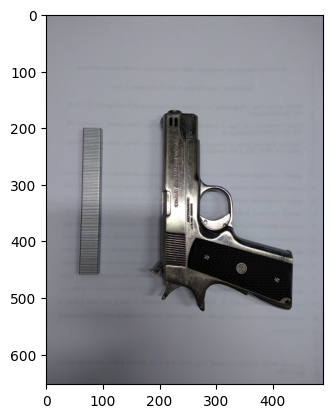

In [53]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image

I = cv2.imread("SGun.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

Original = I.copy()

plt.imshow(I)

(np.float64(-0.5), np.float64(489.5), np.float64(652.5), np.float64(-0.5))

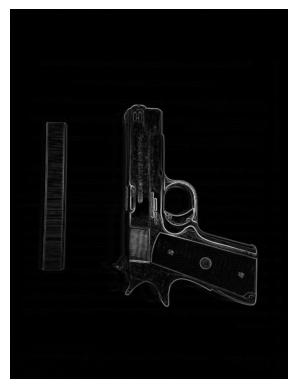

In [54]:
grayScale = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

Ix = cv2.Sobel(grayScale,ddepth=cv2.CV_64F,dx=1,dy=0)
Iy = cv2.Sobel(grayScale,ddepth=cv2.CV_64F,dx=0,dy=1)

magnitude = np.sqrt((Ix * Ix) + (Iy * Iy))

plt.imshow(magnitude, cmap="gray")
plt.axis("off")

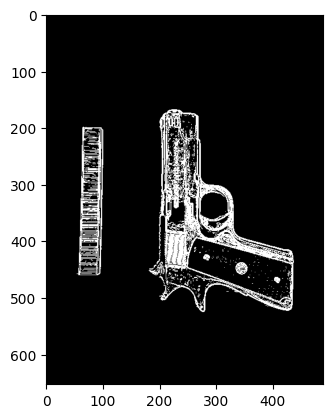

In [55]:
imgThresh = np.mean(magnitude) + 50

imgThresh, mask = cv2.threshold(magnitude, thresh = imgThresh, maxval = 255, type = cv2.THRESH_BINARY)

plt.imshow(mask, cmap="gray")

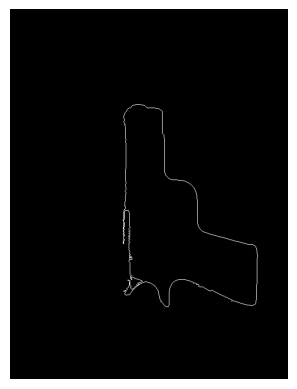

(np.float64(-0.5), np.float64(489.5), np.float64(652.5), np.float64(-0.5))

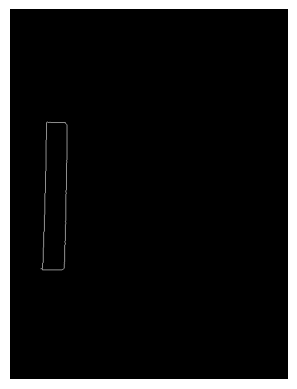

In [ ]:
blank1 = np.full(mask.shape, 0, np.uint8)
blank2 = np.full(mask.shape, 0, np.uint8)

contours, uselessMatlike = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)

c1 = contours[0]

item1 = cv2.drawContours(blank1, c1, contourIdx=-1, color=(255,255,255), thickness=1)

c2 = contours[1]

item2 = cv2.drawContours(blank2, c2, contourIdx=-1, color=(255,255,255), thickness=1)

plt.imshow(item1, cmap="gray")
plt.axis('off')

plt.show()
plt.imshow(item2, cmap="gray")
plt.axis('off')

In [ ]:
right = max(np.where(item1 > 100)[1])

croppedImage = maskedImg[top:bottom, left:right]
croppedAlpha = alpha[top:bottom, left:right]